In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
df = pd.read_csv("./train_2v.csv") #loading csv file to read the data
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# Visualization of Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D4C1CC0>,
      dtype=object)

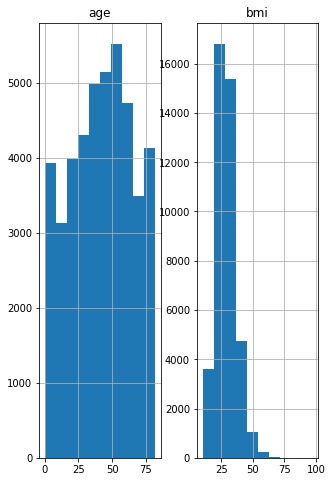

In [6]:
df[['age','bmi']].hist(figsize=(5,8)) #evaluating age and bmi distribution

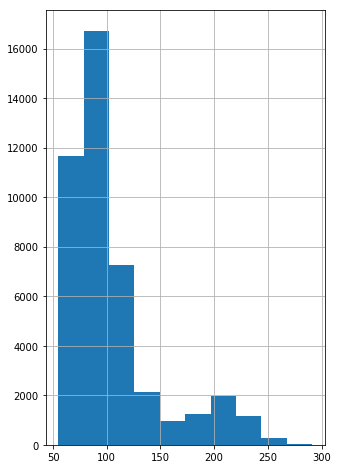

In [7]:
df['avg_glucose_level'].hist(figsize=(5,8)) #evaluating glucose leve distribution

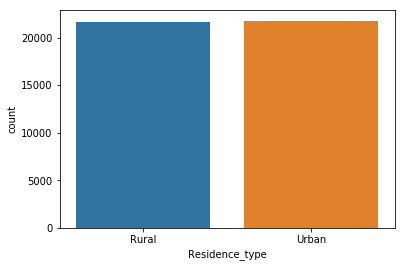

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Residence_type', data=df)

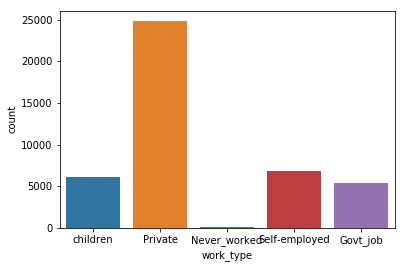

In [9]:
sns.countplot(x='work_type', data=df)

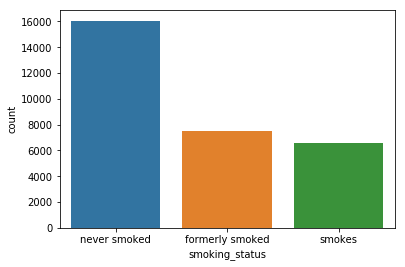

In [10]:
sns.countplot(x='smoking_status', data=df)

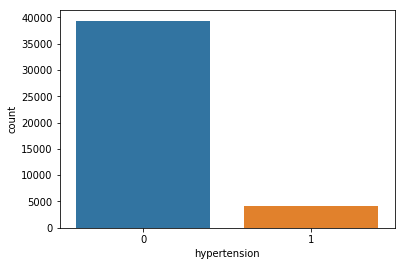

In [11]:
sns.countplot(x='hypertension', data=df)

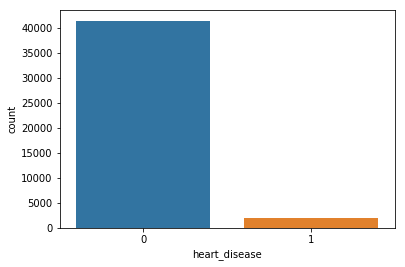

In [12]:
sns.countplot(x='heart_disease', data=df)

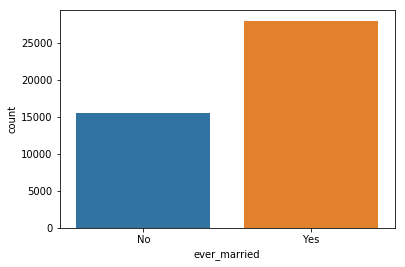

In [13]:
sns.countplot(x='ever_married', data=df)

In [14]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# Data Preprocessing

In [15]:
# Replace NULL values using median
median = df['bmi'].median()
df['bmi'].fillna(median, inplace=True)

In [16]:
# Change string to numerical values
ever_married_map = {'Yes' : 1, 'No' : 0}
df['ever_married'] = df['ever_married'].map(ever_married_map)

In [17]:
# Change string to numerical values
smoking_map = {'never smoked' : 0, 'formerly smoked' : 1, 'smokes' : 2}
df['smoking_status'] = df['smoking_status'].map(smoking_map)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,0,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,1,Private,Urban,87.96,39.2,0.0,0
2,16523,Female,8.0,0,0,0,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,1,Private,Rural,69.04,35.9,1.0,0
4,46136,Male,14.0,0,0,0,Never_worked,Rural,161.28,19.1,NaN,0


In [18]:
# Change string to numerical values
gender_map = {'Male' : 0, 'Female' : 1}
df['gender'] = df['gender'].map(gender_map)

In [19]:
# Change string to numerical values
df = pd.concat([df,pd.get_dummies(df['Residence_type'], prefix = 'residence')], axis=1)
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,residence_Rural,residence_Urban
0,30669,0.0,3.0,0,0,0,children,Rural,95.12,18.0,NaN,0,1,0
1,30468,0.0,58.0,1,0,1,Private,Urban,87.96,39.2,0.0,0,0,1
2,16523,1.0,8.0,0,0,0,Private,Urban,110.89,17.6,NaN,0,0,1


In [20]:
# Change string to numerical values
df = pd.concat([df,pd.get_dummies(df['work_type'], prefix = 'work')], axis=1)

In [21]:
# Remove redundant columns
del df['id']
del df['Residence_type']
del df['work_type']

In [22]:
# Drop any rows with null value
df= df.dropna()

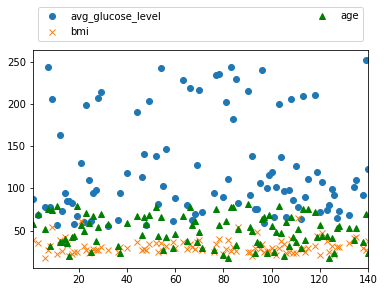

In [23]:
dataset_plot = df
dataset_plot[['avg_glucose_level','bmi','age']].head(100).plot(style=['o','x','g^'])
plt.legend(bbox_to_anchor=(0.,1.02,1., .102), loc=3,ncol=2, mode="expand")

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

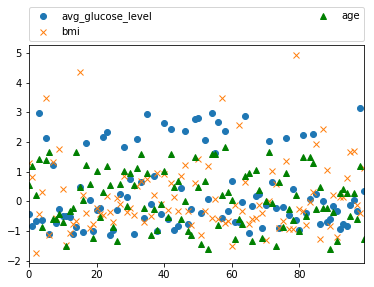

In [26]:
stroke = scaler.fit_transform(df[['avg_glucose_level','bmi','age']])
storkeDataFrame = pd.DataFrame(stroke)
storkeDataFrame.columns = ['avg_glucose_level','bmi','age']
storkeDataFrame.head(100).plot(style=['o','x','g^'])
plt.legend(bbox_to_anchor=(0.,1.02,1., 10.), loc=3,ncol=2, mode="expand", borderaxespad=0.)

# Implementing Machine Learning Models

## Logistic Regression

In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [77]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [78]:
print(X_train.head())
print('**************************************************************')
print(X_test.head())


       gender   age  hypertension  heart_disease  ever_married  \
42693     1.0  45.0             0              0             1   
43200     1.0  71.0             0              0             1   
6039      0.0  68.0             1              0             1   
21593     0.0  76.0             0              0             1   
28824     0.0  80.0             0              0             1   

       avg_glucose_level   bmi  smoking_status  residence_Rural  \
42693              60.62  30.5             1.0                0   
43200              96.53  27.7             2.0                1   
6039              198.13  27.6             1.0                1   
21593              96.34  22.3             1.0                1   
28824             185.39  23.0             1.0                1   

       residence_Urban  work_Govt_job  work_Never_worked  work_Private  \
42693                1              0                  0             1   
43200                0              0               

In [64]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
log_model.score(X_train,y_train)

0.9792765480294032

In [66]:
log_model.score(X_test,y_test)

0.9769102990033223

In [31]:
#Checking accuracy through confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
y_predicted=log_model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted) 

In [32]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8859
           1       0.00      0.00      0.00       171

    accuracy                           0.98      9030
   macro avg       0.49      0.50      0.50      9030
weighted avg       0.96      0.98      0.97      9030



C:\Users\Clinton\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[8859    0]
 [ 171    0]]


Text(69.0, 0.5, 'Truth')

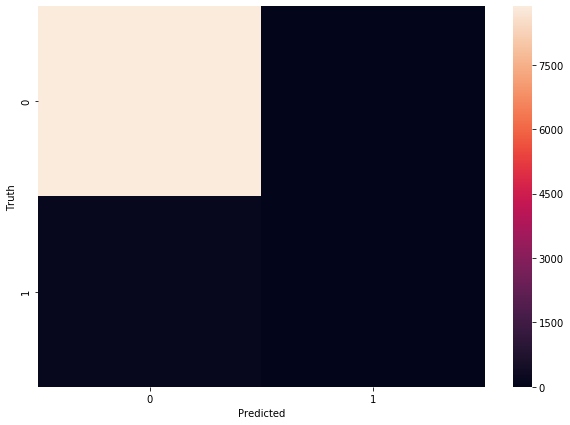

In [33]:
#plotting confusion matrix
import seaborn as sn 
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
def plot_roc_curve(fpr, tpr, algoname):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - ' + algoname)
    plt.legend()
    plt.show()

AUC: 0.84


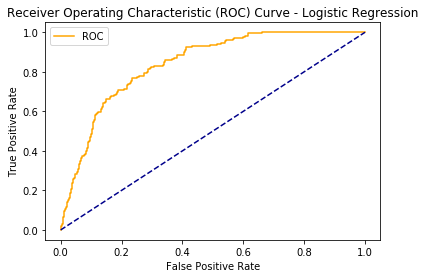

<Figure size 432x288 with 0 Axes>

In [35]:
# when u have to check the performance of a multi class classification problem at various threshold settings, 
#thats when you use a auc-roc curve. Here AUC is Area under the curve and ROC is Receiver operating characteristic
# ROC is probability curve and AUC is represents degree or measure of separability

# Higher the AUC, better is the model is at predicting 0s as 0s and 1s as 1s

# ROC curve is represented by plotting the TPR(along the y axis) against the FPR

# An excellent model has AUC near to the 1 which means it has good measure of separability. 
# A poor model has AUC near to the 0 which means it has worst measure of separability.

# TPR/Recall/Sensitivity = TP/(TP+FN)

# Specificity = TN/(TN+FP)

# FPR = 1- specificity = FP/(TN+FP)

# As the sensitivity increases, specificity decreases, and vice versa
# As TPR increases, FPR also increases


from sklearn.metrics import roc_auc_score,roc_curve

probs = log_model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr, 'Logistic Regression')

plt.savefig('roc_curve.png', dpi=200)

## Decision Tree Classifier

In [36]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
X_train

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,residence_Rural,residence_Urban,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
17260,1.0,33.0,0,0,0,144.91,31.0,0.0,0,1,0,0,1,0,0
3864,0.0,54.0,0,0,1,247.97,36.1,1.0,0,1,0,0,1,0,0
34329,0.0,54.0,1,1,1,210.77,27.5,0.0,1,0,1,0,0,0,0
10480,0.0,43.0,0,0,1,99.87,30.1,1.0,1,0,0,0,1,0,0
8628,1.0,65.0,0,0,1,179.24,27.7,1.0,0,1,0,0,1,0,0
4165,1.0,57.0,0,0,1,73.00,26.2,0.0,0,1,0,0,1,0,0
34703,1.0,37.0,0,0,0,167.76,28.5,2.0,0,1,0,0,1,0,0
28256,0.0,29.0,0,0,1,112.50,29.9,2.0,1,0,0,0,0,1,0
8707,0.0,74.0,1,1,1,74.61,24.1,2.0,0,1,0,0,1,0,0
14891,1.0,78.0,1,0,1,92.08,33.1,0.0,0,1,0,0,0,1,0


In [38]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
dc.score(X_train, y_train)

1.0

In [40]:
dc.score(X_test, y_test)

0.958139534883721

In [41]:
y_predicted=dc.predict(X_test)
cm=confusion_matrix(y_test,y_predicted) 

In [42]:
# f1-score: this is the harmonic mean of precision and recall:

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8859
           1       0.06      0.09      0.07       171

    accuracy                           0.96      9030
   macro avg       0.52      0.53      0.53      9030
weighted avg       0.96      0.96      0.96      9030



[[8637  222]
 [ 156   15]]


Text(69.0, 0.5, 'Truth')

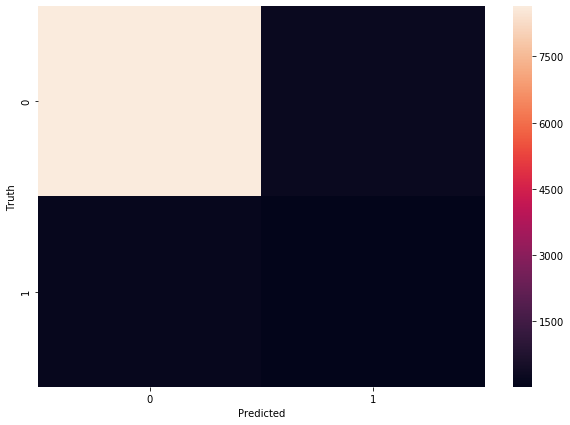

In [43]:
#plotting classification report
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Truth')

AUC: 0.53


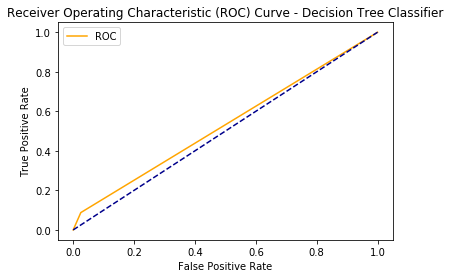

In [44]:
probs = dc.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr, 'Decision Tree Classifier')

## Random Forest Classifer

In [45]:
#Using Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
random_forest = RandomForestClassifier(n_estimators=10) # at 60 and 68 we are getting slightly less percent of random_forest.score(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
test1 = random_forest.predict(X_test) 

In [48]:
random_forest.score(X_test, y_test)

0.9809523809523809

In [49]:
random_forest.score(X_train, y_train) 

0.9947790592814088

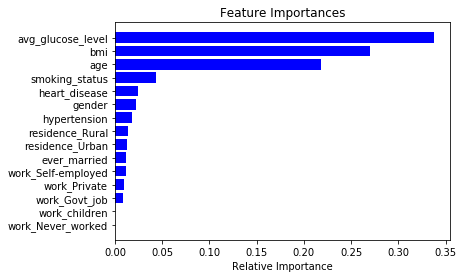

In [50]:
#feature importance
importances = random_forest.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),['work_Never_worked', 'work_children', 'work_Govt_job','work_Private',
                                'work_Self-employed','ever_married','residence_Urban','residence_Rural',
                                'hypertension','gender','heart_disease','smoking_status','age','bmi','avg_glucose_level'])
plt.xlabel('Relative Importance')
plt.show()

In [51]:
#checking accuracy through confusion matrix
y_predicted=random_forest.predict(X_test)
cm=confusion_matrix(y_test,y_predicted) 

In [52]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8859
           1       0.00      0.00      0.00       171

    accuracy                           0.98      9030
   macro avg       0.49      0.50      0.50      9030
weighted avg       0.96      0.98      0.97      9030



[[8858    1]
 [ 171    0]]


Text(69.0, 0.5, 'Truth')

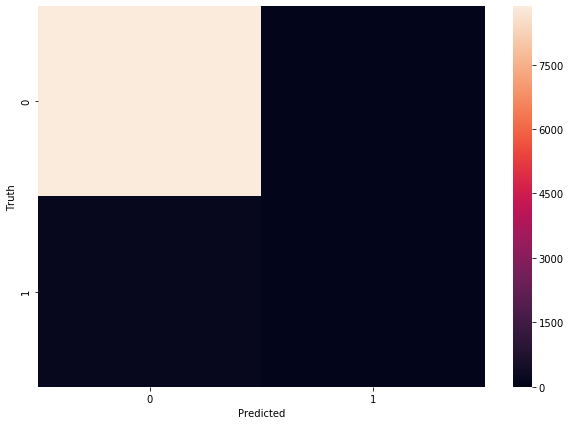

In [53]:
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Truth')

AUC: 0.64


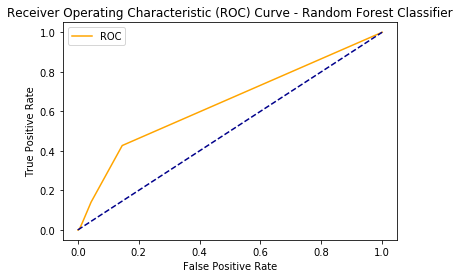

In [54]:
probs = random_forest.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr, 'Random Forest Classifier')

In [55]:
from sklearn.svm import SVC 
model = SVC(gamma=100,probability=True,kernel='linear')

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
y_predicted=model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted) 
print(classification_report(y_test,y_predicted))

In [ ]:
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr, 'Support Vector')